# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Mon Mar  9 07:23:23 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
%config IPCompleter.greedy=True

In [3]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [4]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [5]:
import torch
print(torch.__version__)

1.4.0


In [6]:
preproc = preprocessing.Preprocessing()
train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()

In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


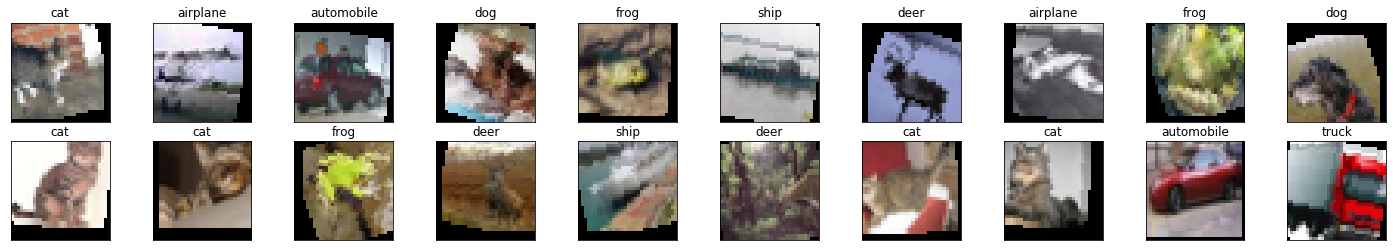

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [10]:
cnn_model, device = utils.Utils.createmodelresnet18()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=0)
# scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=2,
#                                         verbose=True)

In [13]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 51
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
#     scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.199143648147583 Batch_id=390 Accuracy=44.39: 100%|██████████| 391/391 [00:48<00:00,  7.99it/s] 



Test set: Average loss: 0.0109, Accuracy: 5321/10000 (53.21%)

Validation accuracy increased (0.000000 --> 53.210000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


Loss=0.9878288507461548 Batch_id=390 Accuracy=61.08: 100%|██████████| 391/391 [00:49<00:00,  7.94it/s]



Test set: Average loss: 0.0078, Accuracy: 6629/10000 (66.29%)

Validation accuracy increased (53.210000 --> 66.290000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  3
EPOCH: 3


Loss=0.8356467485427856 Batch_id=390 Accuracy=68.24: 100%|██████████| 391/391 [00:49<00:00,  7.86it/s]



Test set: Average loss: 0.0062, Accuracy: 7317/10000 (73.17%)

Validation accuracy increased (66.290000 --> 73.170000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


Loss=0.7900675535202026 Batch_id=390 Accuracy=73.05: 100%|██████████| 391/391 [00:50<00:00,  7.81it/s] 



Test set: Average loss: 0.0057, Accuracy: 7603/10000 (76.03%)

Validation accuracy increased (73.170000 --> 76.030000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


Loss=0.5503497123718262 Batch_id=390 Accuracy=75.54: 100%|██████████| 391/391 [00:50<00:00,  7.68it/s] 



Test set: Average loss: 0.0051, Accuracy: 7841/10000 (78.41%)

Validation accuracy increased (76.030000 --> 78.410000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  6
EPOCH: 6


Loss=0.6325945854187012 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:54<00:00,  7.12it/s] 



Test set: Average loss: 0.0049, Accuracy: 7920/10000 (79.20%)

Validation accuracy increased (78.410000 --> 79.200000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  7
EPOCH: 7


Loss=0.5599003434181213 Batch_id=390 Accuracy=79.97: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s] 



Test set: Average loss: 0.0044, Accuracy: 8108/10000 (81.08%)

Validation accuracy increased (79.200000 --> 81.080000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  8
EPOCH: 8


Loss=0.4495404362678528 Batch_id=390 Accuracy=81.08: 100%|██████████| 391/391 [00:59<00:00,  6.53it/s] 



Test set: Average loss: 0.0040, Accuracy: 8337/10000 (83.37%)

Validation accuracy increased (81.080000 --> 83.370000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  9
EPOCH: 9


Loss=0.7030236721038818 Batch_id=390 Accuracy=82.48: 100%|██████████| 391/391 [01:00<00:00,  6.51it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7917/10000 (79.17%)

Learning rate = 0.01  for epoch:  10
EPOCH: 10


Loss=0.3782326281070709 Batch_id=390 Accuracy=83.43: 100%|██████████| 391/391 [01:02<00:00,  6.22it/s] 



Test set: Average loss: 0.0036, Accuracy: 8510/10000 (85.10%)

Validation accuracy increased (83.370000 --> 85.100000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  11
EPOCH: 11


Loss=0.6389675736427307 Batch_id=390 Accuracy=84.35: 100%|██████████| 391/391 [01:02<00:00,  6.22it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8319/10000 (83.19%)

Learning rate = 0.01  for epoch:  12
EPOCH: 12


Loss=0.33337146043777466 Batch_id=390 Accuracy=85.31: 100%|██████████| 391/391 [01:02<00:00,  6.21it/s]



Test set: Average loss: 0.0034, Accuracy: 8597/10000 (85.97%)

Validation accuracy increased (85.100000 --> 85.970000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  13
EPOCH: 13


Loss=0.21961498260498047 Batch_id=390 Accuracy=85.92: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]



Test set: Average loss: 0.0032, Accuracy: 8700/10000 (87.00%)

Validation accuracy increased (85.970000 --> 87.000000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  14
EPOCH: 14


Loss=0.2021695077419281 Batch_id=390 Accuracy=86.47: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8594/10000 (85.94%)

Learning rate = 0.01  for epoch:  15
EPOCH: 15


Loss=0.27787619829177856 Batch_id=390 Accuracy=86.99: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8630/10000 (86.30%)

Learning rate = 0.01  for epoch:  16
EPOCH: 16


Loss=0.3800422251224518 Batch_id=390 Accuracy=87.62: 100%|██████████| 391/391 [01:04<00:00,  6.09it/s] 



Test set: Average loss: 0.0032, Accuracy: 8731/10000 (87.31%)

Validation accuracy increased (87.000000 --> 87.310000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  17
EPOCH: 17


Loss=0.263849675655365 Batch_id=390 Accuracy=88.24: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]  



Test set: Average loss: 0.0030, Accuracy: 8828/10000 (88.28%)

Validation accuracy increased (87.310000 --> 88.280000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  18
EPOCH: 18


Loss=0.3915404677391052 Batch_id=390 Accuracy=88.47: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8813/10000 (88.13%)

Learning rate = 0.01  for epoch:  19
EPOCH: 19


Loss=0.3094121515750885 Batch_id=390 Accuracy=88.91: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8750/10000 (87.50%)

Learning rate = 0.01  for epoch:  20
EPOCH: 20


Loss=0.3354524075984955 Batch_id=390 Accuracy=89.55: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8810/10000 (88.10%)

Learning rate = 0.01  for epoch:  21
EPOCH: 21


Loss=0.2506418824195862 Batch_id=390 Accuracy=89.80: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8790/10000 (87.90%)

Learning rate = 0.01  for epoch:  22
EPOCH: 22


Loss=0.25847291946411133 Batch_id=390 Accuracy=90.11: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]



Test set: Average loss: 0.0029, Accuracy: 8838/10000 (88.38%)

Validation accuracy increased (88.280000 --> 88.380000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  23
EPOCH: 23


Loss=0.39371785521507263 Batch_id=390 Accuracy=90.58: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]



Test set: Average loss: 0.0027, Accuracy: 8938/10000 (89.38%)

Validation accuracy increased (88.380000 --> 89.380000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  24
EPOCH: 24


Loss=0.20985624194145203 Batch_id=390 Accuracy=90.88: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8849/10000 (88.49%)

Learning rate = 0.01  for epoch:  25
EPOCH: 25


Loss=0.24353107810020447 Batch_id=390 Accuracy=91.23: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8715/10000 (87.15%)

Learning rate = 0.01  for epoch:  26
EPOCH: 26


Loss=0.2985350489616394 Batch_id=390 Accuracy=91.37: 100%|██████████| 391/391 [01:02<00:00,  6.27it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8832/10000 (88.32%)

Learning rate = 0.01  for epoch:  27
EPOCH: 27


Loss=0.17941418290138245 Batch_id=390 Accuracy=91.79: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]



Test set: Average loss: 0.0028, Accuracy: 8949/10000 (89.49%)

Validation accuracy increased (89.380000 --> 89.490000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  28
EPOCH: 28


Loss=0.26910191774368286 Batch_id=390 Accuracy=92.06: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]



Test set: Average loss: 0.0027, Accuracy: 8954/10000 (89.54%)

Validation accuracy increased (89.490000 --> 89.540000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  29
EPOCH: 29


Loss=0.2821016311645508 Batch_id=390 Accuracy=92.21: 100%|██████████| 391/391 [00:59<00:00,  6.60it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8946/10000 (89.46%)

Learning rate = 0.01  for epoch:  30
EPOCH: 30


Loss=0.1809772104024887 Batch_id=390 Accuracy=92.18: 100%|██████████| 391/391 [01:04<00:00,  6.09it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8935/10000 (89.35%)

Learning rate = 0.01  for epoch:  31
EPOCH: 31


Loss=0.28377485275268555 Batch_id=390 Accuracy=92.63: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]



Test set: Average loss: 0.0026, Accuracy: 9011/10000 (90.11%)

Validation accuracy increased (89.540000 --> 90.110000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  32
EPOCH: 32


Loss=0.31455639004707336 Batch_id=390 Accuracy=92.73: 100%|██████████| 391/391 [01:02<00:00,  6.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9009/10000 (90.09%)

Learning rate = 0.01  for epoch:  33
EPOCH: 33


Loss=0.19449642300605774 Batch_id=390 Accuracy=93.37: 100%|██████████| 391/391 [01:04<00:00,  6.09it/s]



Test set: Average loss: 0.0026, Accuracy: 9037/10000 (90.37%)

Validation accuracy increased (90.110000 --> 90.370000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  34
EPOCH: 34


Loss=0.1840324103832245 Batch_id=390 Accuracy=93.56: 100%|██████████| 391/391 [01:02<00:00,  6.25it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8965/10000 (89.65%)

Learning rate = 0.01  for epoch:  35
EPOCH: 35


Loss=0.2046642303466797 Batch_id=390 Accuracy=93.42: 100%|██████████| 391/391 [01:01<00:00,  6.33it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8680/10000 (86.80%)

Learning rate = 0.01  for epoch:  36
EPOCH: 36


Loss=0.2033878117799759 Batch_id=390 Accuracy=93.57: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9035/10000 (90.35%)

Learning rate = 0.01  for epoch:  37
EPOCH: 37


Loss=0.15333525836467743 Batch_id=390 Accuracy=93.85: 100%|██████████| 391/391 [01:03<00:00,  6.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8967/10000 (89.67%)

Learning rate = 0.01  for epoch:  38
EPOCH: 38


Loss=0.13736987113952637 Batch_id=390 Accuracy=94.20: 100%|██████████| 391/391 [01:02<00:00,  6.30it/s]



Test set: Average loss: 0.0026, Accuracy: 9079/10000 (90.79%)

Validation accuracy increased (90.370000 --> 90.790000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  39
EPOCH: 39


Loss=0.1571238785982132 Batch_id=390 Accuracy=94.34: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8993/10000 (89.93%)

Learning rate = 0.01  for epoch:  40
EPOCH: 40


Loss=0.18155613541603088 Batch_id=390 Accuracy=94.35: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9029/10000 (90.29%)

Learning rate = 0.01  for epoch:  41
EPOCH: 41


Loss=0.16597244143486023 Batch_id=390 Accuracy=94.54: 100%|██████████| 391/391 [01:02<00:00,  6.21it/s]



Test set: Average loss: 0.0024, Accuracy: 9137/10000 (91.37%)

Validation accuracy increased (90.790000 --> 91.370000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  42
EPOCH: 42


Loss=0.23199114203453064 Batch_id=390 Accuracy=94.65: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9102/10000 (91.02%)

Learning rate = 0.01  for epoch:  43
EPOCH: 43


Loss=0.2363458126783371 Batch_id=390 Accuracy=94.80: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9108/10000 (91.08%)

Learning rate = 0.01  for epoch:  44
EPOCH: 44


Loss=0.1206660270690918 Batch_id=390 Accuracy=95.13: 100%|██████████| 391/391 [01:02<00:00,  6.27it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9041/10000 (90.41%)

Learning rate = 0.01  for epoch:  45
EPOCH: 45


Loss=0.19927984476089478 Batch_id=390 Accuracy=95.02: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9092/10000 (90.92%)

Learning rate = 0.01  for epoch:  46
EPOCH: 46


Loss=0.07349397987127304 Batch_id=390 Accuracy=95.25: 100%|██████████| 391/391 [01:02<00:00,  6.28it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9013/10000 (90.13%)

Learning rate = 0.01  for epoch:  47
EPOCH: 47


Loss=0.08159853518009186 Batch_id=390 Accuracy=95.32: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s] 



Test set: Average loss: 0.0024, Accuracy: 9157/10000 (91.57%)

Validation accuracy increased (91.370000 --> 91.570000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  48
EPOCH: 48


Loss=0.3032204508781433 Batch_id=390 Accuracy=95.49: 100%|██████████| 391/391 [01:04<00:00,  6.09it/s]  



Test set: Average loss: 0.0025, Accuracy: 9158/10000 (91.58%)

Validation accuracy increased (91.570000 --> 91.580000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  49
EPOCH: 49


Loss=0.1394372284412384 Batch_id=390 Accuracy=95.66: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9108/10000 (91.08%)

Learning rate = 0.01  for epoch:  50
EPOCH: 50


Loss=0.08445322513580322 Batch_id=390 Accuracy=95.75: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s] 



Test set: Average loss: 0.0025, Accuracy: 9144/10000 (91.44%)

Learning rate = 0.01  for epoch:  51


In [14]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 85% (3378/3968)
Test Accuracy of automobile: 93% (3651/3913)
Test Accuracy of  bird: 81% (3272/4018)
Test Accuracy of   cat: 73% (2918/3976)
Test Accuracy of  deer: 85% (3356/3942)
Test Accuracy of   dog: 81% (3269/4000)
Test Accuracy of  frog: 89% (3533/3935)
Test Accuracy of horse: 88% (3506/3966)
Test Accuracy of  ship: 92% (3507/3799)
Test Accuracy of truck: 92% (3674/3983)

Test Accuracy (Overall): 86% (34064/39500)


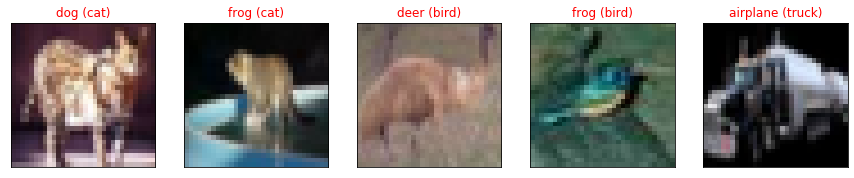

In [15]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

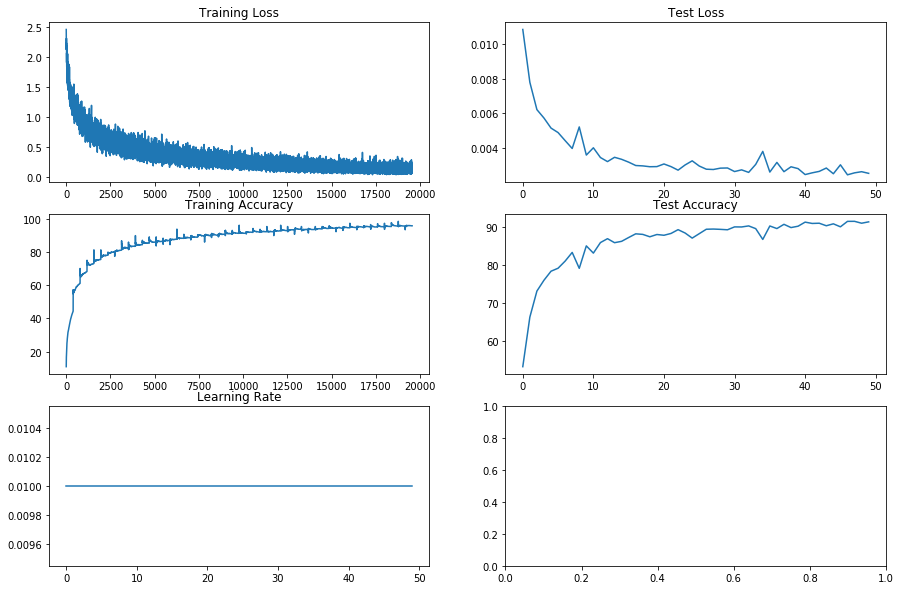

In [16]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [17]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)